## Study session 9 - pandas and visualization
### BIOINF 575 - Fall 2020
SOLUTIONS

___

#### Processing the worm genome file - using pandas
You will convert the GFF3 file for the C. elegans genome into 2 related dictionaries. The GFF3 file is   Caenorhabditis_elegans.WBcel235.91.gff3 and is also available in the github repository (you should have it in the study session if you updated the repo). The GFF3 format is described on:
https://github.com/The-Sequence-Ontology/Specifications/blob/master/gff3.md.<br> 

After the comment and header lines (marked by "#"), a line in a GFF3 file (row of a table) is composed of 9 tab-delimited fields (columns). The first 8 are called features. These are all atomic (consist of only one element), so they get put into a dictionary features with no problems. You will need to define a key and you will have to generate those integers as you read the file in and add data to the dictionary.

The ninth field will pose more of a problem. It consists of tag-value pairs. **The tag-value pairs are separated by a semi-colon, ";". The the tag and value in a pair are  separated by equal signs, "=", and the values may consist of mulitiple, comma, ",", separated entries.** Also, any value may be encoded as html-safe encoding. Caution: the encoded characters may be the same as those used to separate the components of the attributes field. To get rid of the encoding (these are  pairs of characters or digits preceded by the % sign), use the unquote() function from urllib.parse (`from urllib.parse import unquote`). Just be careful of when you use it - do it at the wrong time and you will mess up the parsing of attributes.

From the definition of the GFF3 we have these fields

Each line contains the following information for a genomic features:  `seqid, source, type, start, end, score, strand, phase, attributes`.


The attributes column contains the following information: ;-separated pairs of tag=value, where the values may consist of mulitiple, comma, ",", separated entries.




____

### <font color = "red">Exercise</font>

#### - Load data from a file and get it ready for analysis:
- Open the `Caenorhabditis_elegans.WBcel235.91.gff3` and check the format.
- Read the data from the `Caenorhabditis_elegans.WBcel235.91.gff3` into a dataframe.
- Set the column names to: ` seqid, source, type, start, end, score, strand, phase, attributes`. 
- Set the row names to: `Feature0, ..., FeatureX, ... FeatureN`, where X is the row index and N the number of rows.




In [1]:
import numpy as np
import pandas as pd


#help(pd.read_csv)

# Also you can use the: contextual help 
# right click the notebook select > show contextual help
# select the tab of the contextual help from the tabs of the opened files
# drag and drop it to the right of your notebook window
# you should have something that looks like a split screen 
# with your notebook to the left anf the contextual help window on the right
# now on a cell in the notebook write a function name like abs, or print 
# - the help for the function should show in the right window  (contextual help window)


In [2]:
file_name = "Caenorhabditis_elegans.WBcel235.91.gff3"

In [3]:
# The following statement gives an error because it uses the comma as a separator (read_csv - Comma Separated Values)
# by default the separator is ","
# by default the first line is a header line

# pd.read_csv(file_name)  

In [4]:
# sep argument - set to "\t" because our data is tab-separated
# comment argument - set to "#" to ignore comment lines and other comments in our file
# header argument - set to None because our data does not have a header line 

dataset = pd.read_csv(file_name, sep = "\t", 
                      comment = "#", header = None)
dataset.head()

,0,1,2,3,4,5,6,7,8
0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...


In [5]:
# Pandas DataFrames have a columns attribute that allows us to retrieve or set the column names
# Pandas DataFrames have an index attribute that allows us to retrieve or set the row names
# Pandas DataFrames have a shape attribute that allows us to retrieve the number of rows and columns 
#   in a tuple format

dataset.columns = ("seqid", "source", "type", "start", "end", 
                   "score", "strand", "phase", "attributes")
dataset.index = [f"Feature{i}" for i in range(dataset.shape[0])]
dataset.head()

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
Feature3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
Feature4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...


______

#### - Compute how many types of genomic features there are in our dataset and how many features of each kind. (e.g.: gene, exon, mRNA in the third column in the file are feature types)


#### If you are trying to do a common operation on a dataframe or Series (dataframe column) it may have already been implemented - look for a function that does what you need in the documentation.

Useful links to see the attributes (variables, properties) and methods (functions) a column of a pandas dataframe (Series) and a pandas dataframe has:    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [6]:
# dir(type(dataset.type))

In [7]:
# Access DataFrame columns by using DataFrame.column_name

dataset.source

Feature0         WormBase
Feature1         WormBase
Feature2         WormBase
Feature3         WormBase
Feature4         WormBase
                   ...   
Feature659616    WormBase
Feature659617    WormBase
Feature659618    WormBase
Feature659619    WormBase
Feature659620    WormBase
Name: source, Length: 659621, dtype: object

In [8]:
# check the first few elements

dataset.source.head()

Feature0    WormBase
Feature1    WormBase
Feature2    WormBase
Feature3    WormBase
Feature4    WormBase
Name: source, dtype: object

In [9]:
# check the column type - it's a Series

type(dataset.source)

pandas.core.series.Series

In [10]:
# check the column name

dataset.source.name

'source'

In [11]:
# pandas.core.series.Series.nunique(dropna: bool = True) -> int
# Return s number of unique elements in the object.
# Excludes NA values by default.


dataset.type.nunique()

19

In [12]:
#pandas.core.series.Series.value_counts(
#    normalize=False,
#    sort=True,
#    ascending=False,
#    bins=None,
#    dropna=True,
#)

#Returns a Series containing counts of unique values.
# The resulting object will be in descending order so that the
# first element is the most frequently-occurring element.
# Excludes NA values by default.

dataset.type.value_counts()

exon                      269904
CDS                       222859
mRNA                       33391
five_prime_UTR             30960
three_prime_UTR            28004
ncRNA_gene                 24765
gene                       20222
piRNA                      15364
ncRNA                       8402
pseudogenic_transcript      1827
pseudogene                  1791
tRNA                         634
miRNA                        454
snoRNA                       345
lnc_RNA                      283
pre_miRNA                    257
snRNA                        130
rRNA                          22
chromosome                     7
Name: type, dtype: int64

_____ 

### - Find the genes between positions: 4000 and 10000.
    - Hint: start and end (4th and 5th columns in the file) need to be between these numbers.

In [13]:
# conditional subsetting to select rows that meet the condition
# combine condition using & (bit-wise and operator) 
# use parantheses to evaluate the condition first 
# parantheses are needed because & has higher precedence than comparison operators (>, < , ==, ...)

dataset[(dataset.type == "gene") & (dataset.start > 4000) & (dataset.end < 10000)]


,seqid,source,type,start,end,score,strand,phase,attributes
Feature93697,II,WormBase,gene,6664,9486,.,+,.,ID=gene:WBGene00015287;Name=osta-1;biotype=pro...
Feature434203,MtDNA,WormBase,gene,4504,5621,.,+,.,ID=gene:WBGene00000829;Name=ctb-1;biotype=prot...
Feature434211,MtDNA,WormBase,gene,5678,6449,.,+,.,ID=gene:WBGene00010962;Name=ctc-3;biotype=prot...
Feature434219,MtDNA,WormBase,gene,6506,7808,.,+,.,ID=gene:WBGene00010963;Name=nduo-4;biotype=pro...
Feature434224,MtDNA,WormBase,gene,7827,9428,.,+,.,ID=gene:WBGene00010964;Name=ctc-1;biotype=prot...
Feature434291,V,WormBase,gene,6588,7822,.,-,.,ID=gene:WBGene00002061;Name=ife-3;biotype=prot...
Feature434364,V,WormBase,gene,8575,8739,.,-,.,ID=gene:WBGene00255704;Name=B0348.10;biotype=p...


In [14]:
# Conditional subsetting to retrieve rows that meet the condition
# we use .loc attribute when we want to also subset the columns

dataset.loc[(dataset.type == "gene") & (dataset.start > 4000) & (dataset.end < 10000), :"end"]


,seqid,source,type,start,end
Feature93697,II,WormBase,gene,6664,9486
Feature434203,MtDNA,WormBase,gene,4504,5621
Feature434211,MtDNA,WormBase,gene,5678,6449
Feature434219,MtDNA,WormBase,gene,6506,7808
Feature434224,MtDNA,WormBase,gene,7827,9428
Feature434291,V,WormBase,gene,6588,7822
Feature434364,V,WormBase,gene,8575,8739


In [15]:
dataset.head(10)

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
Feature3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
Feature4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...
Feature5,I,WormBase,mRNA,4116,10230,.,-,.,ID=transcript:Y74C9A.3;Parent=gene:WBGene00022...
Feature6,I,WormBase,three_prime_UTR,4116,4220,.,-,.,Parent=transcript:Y74C9A.3
Feature7,I,WormBase,exon,4116,4358,.,-,.,Parent=transcript:Y74C9A.3;Name=Y74C9A.3.e5;co...
Feature8,I,WormBase,CDS,4221,4358,.,-,0,ID=CDS:Y74C9A.3;Parent=transcript:Y74C9A.3;pro...
Feature9,I,WormBase,exon,5195,5296,.,-,.,Parent=transcript:Y74C9A.3;Name=Y74C9A.3.e4;co...


In [16]:
# Use .iloc to subset using indices (positions) for rows and columns

dataset.iloc[3:7, 2:5]

,type,start,end
Feature3,exon,3747,3909
Feature4,gene,4116,10230
Feature5,mRNA,4116,10230
Feature6,three_prime_UTR,4116,4220


_____

#### - Write a function to process the information on the attributes column.
    - The input is the attribute information for one feature (last column data for one line).
    - The output is a dictionary where the tags are the keys and the value is a list of the tag values.
        - Study session 8 solution migt help with this

In [17]:
# import function to decode encoded elements such as ";" that were encoded so they are not confused 
# with the delimiter used to separate attributes: 
# e.g.: Name=CTLA-4%3B cytotoxic T-lymphocyte-associated protein 4; Alias=CD152%3B cluster of differentiation 152;
# instead of:  Name=CTLA-4; cytotoxic T-lymphocyte-associated protein 4; Alias=CD152; cluster of differentiation 152;

from urllib.parse import unquote

# Process the attribute on the last column in our data
# it is a text that contains a collection of tag=value pairs separated by ";", where each value may have multiple elements
# e.g.: "tag1=valA;tag2=valB,valC,valD;tag3=valE,valF"
# the result of the function for the example should be:
# {tag1: [valA], tag2: [valB, valC, valD], tag3: [valE, valF]}


def process_attribute(attr):
    attributes = {}
    attrs_list =  attr.split(";")
    for attr_elem in attrs_list:
        tag, val = attr_elem.split("=")                 
        attributes[tag] = [unquote(val).strip() for val in val.split(",")]
    return attributes

In [18]:
# test with small example data

test_attribute = "tag1=valA;tag2=valB,valC,valD;tag3=valE,valF"

process_attribute(test_attribute)

{'tag1': ['valA'], 'tag2': ['valB', 'valC', 'valD'], 'tag3': ['valE', 'valF']}

In [19]:
# test with a value adapted from the data file values

attr = "ID=gene:WBGene00023193,test;Name=Y74C9A.6;biotype=snoRNA;gene_id=WBGene00023193;logic_name=wormbase_non_coding"
process_attribute(attr)

{'ID': ['gene:WBGene00023193', 'test'],
 'Name': ['Y74C9A.6'],
 'biotype': ['snoRNA'],
 'gene_id': ['WBGene00023193'],
 'logic_name': ['wormbase_non_coding']}

____
#### - Apply this function to all elements of the attribute column to create a column of dictionaries and add that to the dataframe.

In [20]:
# both the pandas Series and the pandas DataFrame have an apply function that 
# allows you to apply a function to each element 
# for Dataframe axis will let you specify if you want to apply the function to the rows or columns

attrs_col_data = dataset.attributes.apply(process_attribute)


In [21]:
# because is the result of apply on the attributes column the result takes the same name

attrs_col_data.name

'attributes'

In [22]:
# check the elements of the results, for each row we got a dictionary

attrs_col_data[0:4]

Feature0    {'ID': ['chromosome:I'], 'Alias': ['BX284601.5...
Feature1    {'ID': ['gene:WBGene00023193'], 'Name': ['Y74C...
Feature2    {'ID': ['transcript:Y74C9A.6'], 'Parent': ['ge...
Feature3    {'Parent': ['transcript:Y74C9A.6'], 'Name': ['...
Name: attributes, dtype: object

In [23]:
attrs_col_data[4]

{'ID': ['gene:WBGene00022277'],
 'Name': ['homt-1'],
 'biotype': ['protein_coding'],
 'description': ['Alpha N-terminal protein methyltransferase 1  [Source:UniProtKB/Swiss-Prot;Acc:Q9N4D9]'],
 'gene_id': ['WBGene00022277'],
 'logic_name': ['wormbase']}

In [24]:
# replace the attributes column from the dataset with the new one
dataset.attributes = attrs_col_data

In [25]:
dataset.head(3)

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"{'ID': ['chromosome:I'], 'Alias': ['BX284601.5..."
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,"{'ID': ['gene:WBGene00023193'], 'Name': ['Y74C..."
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,"{'ID': ['transcript:Y74C9A.6'], 'Parent': ['ge..."


In [26]:
# Remove the attributes column from the dataset 

#dataset = dataset.drop(columns = "attributes")
dataset.drop(columns = "attributes", inplace = True)

In [27]:
dataset.head(3)

,seqid,source,type,start,end,score,strand,phase
Feature0,I,WormBase,chromosome,1,15072434,.,.,.
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.


In [28]:
dataset.join(attrs_col_data)

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"{'ID': ['chromosome:I'], 'Alias': ['BX284601.5..."
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,"{'ID': ['gene:WBGene00023193'], 'Name': ['Y74C..."
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,"{'ID': ['transcript:Y74C9A.6'], 'Parent': ['ge..."
Feature3,I,WormBase,exon,3747,3909,.,-,.,"{'Parent': ['transcript:Y74C9A.6'], 'Name': ['..."
Feature4,I,WormBase,gene,4116,10230,.,-,.,"{'ID': ['gene:WBGene00022277'], 'Name': ['homt..."
...,...,...,...,...,...,...,...,...,...
Feature659616,X,WormBase,exon,17717328,17717443,.,+,.,"{'Parent': ['transcript:cTel55X.1a'], 'Name': ..."
Feature659617,X,WormBase,CDS,17717328,17717443,.,+,0,"{'ID': ['CDS:cTel55X.1a'], 'Parent': ['transcr..."
Feature659618,X,WormBase,CDS,17718435,17718621,.,+,1,"{'ID': ['CDS:cTel55X.1a'], 'Parent': ['transcr..."
Feature659619,X,WormBase,exon,17718435,17718720,.,+,.,"{'Parent': ['transcript:cTel55X.1a'], 'Name': ..."


In [29]:
dataset.head(3)

,seqid,source,type,start,end,score,strand,phase
Feature0,I,WormBase,chromosome,1,15072434,.,.,.
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.


In [30]:
# replace the dataset with the new one that incluses the new column

dataset = dataset.join(attrs_col_data)

In [31]:
dataset.head(3)

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"{'ID': ['chromosome:I'], 'Alias': ['BX284601.5..."
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,"{'ID': ['gene:WBGene00023193'], 'Name': ['Y74C..."
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,"{'ID': ['transcript:Y74C9A.6'], 'Parent': ['ge..."


___
### <font color = "red">Exercise</font>

Load the **iris** dataset from the following url:   

https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

Plot the `petal_length` versus `sepal_length` separate by species.



In [32]:
# load data from url

df_iris = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df_iris.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1221fbd60>,
      dtype=object)

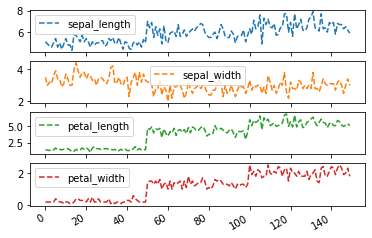

In [34]:
# using pandas plotting (matplotlib-based)
# plot the numeric columns
# set plot properties using the arguments in the plot function


df_iris.plot(linestyle = "dashed", subplots = True)

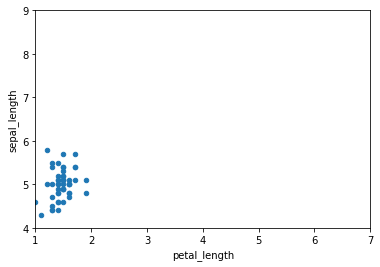

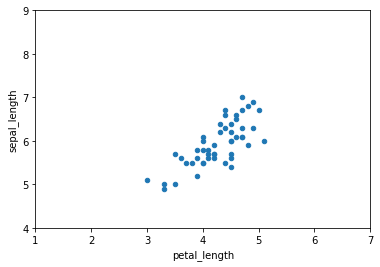

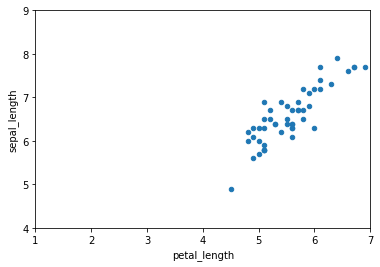

In [35]:
# Set plot properties using the arguments in the plot function

res = df_iris.groupby("species").plot(x = "petal_length", y = "sepal_length", 
                                kind = "scatter", subplots = False, #sharex = True, 
                                xlim = (1,7), ylim = (4,9),
                                xlabel = "Petal length", ylabel = "Sepal length")


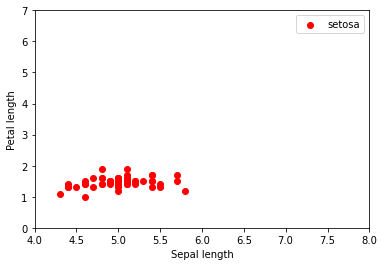

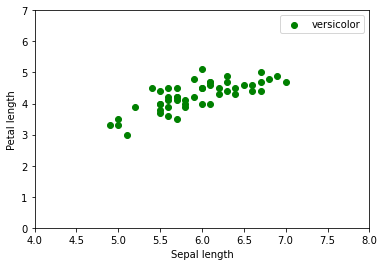

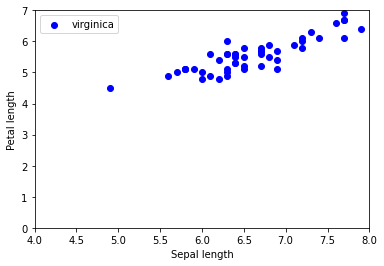

In [46]:
# using matplotlib:

%matplotlib inline
import matplotlib.pyplot as plt

# Change plot properties using pyplot functions

color = ["red", "green", "blue"]
groups = df_iris.groupby("species")
i = 0
for name, group in groups:
    # print(group)
    plt.scatter(group["sepal_length"], group["petal_length"], marker="o", 
                color = color[i], label = name)
    #plt.title(name)
    plt.xlabel("Sepal length")
    plt.ylabel("Petal length")
    plt.xlim(4,8)
    plt.ylim(0,7)
    plt.legend()
    plt.show()
    i += 1
    
    

In [92]:
# dir(df_iris.groupby("species"))

In [91]:
# Group data by category

df_iris.groupby("species").groups

{'setosa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'versicolor': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'virginica': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}

In [84]:
# Compute statistics per group

df_iris.groupby("species").sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,170.9,73.2,12.2
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


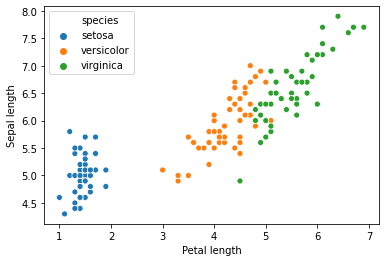

In [83]:
# susing the seaborn library

import seaborn as sns


ax = sns.scatterplot(data = df_iris, x = "petal_length", y = "sepal_length", 
                     hue = "species")
ax.set(xlabel = "Petal length", ylabel = "Sepal length")
plt.show()

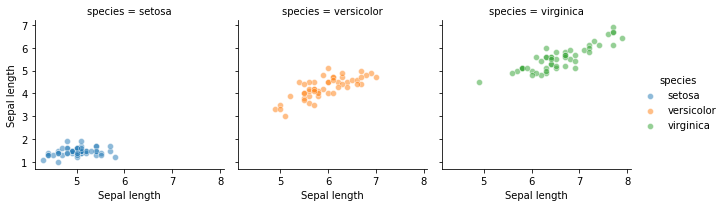

In [82]:
g = sns.FacetGrid(df_iris, col="species", hue="species")
g.map(sns.scatterplot, "sepal_length", "petal_length", alpha=.5)
g.add_legend()
g.set_axis_labels("Sepal length", "Sepal length")
plt.show()

In [33]:
# install plotnine if the import does not work!
# (Windows users) run one of the following two commands in the anaconda console
# (Mac users) run one of the following two commands in a terminal

# pip install plotnine
# or
# conda install -c conda-forge plotnine

from plotnine import *


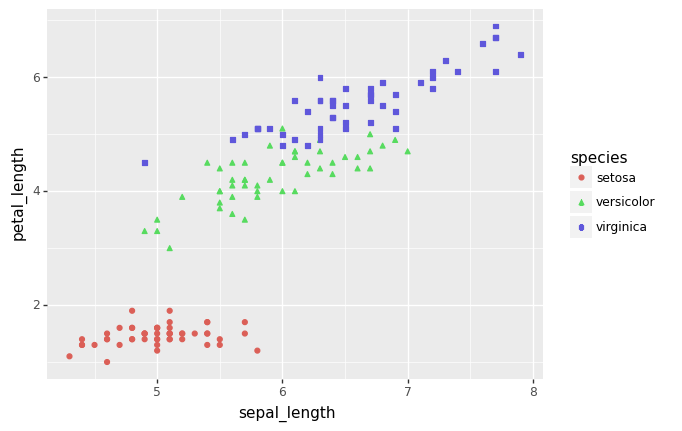

<ggplot: (390188764)>

In [43]:
p = ggplot(df_iris, aes("sepal_length", "petal_length", color="species", shape = "species")) + geom_point() 
p

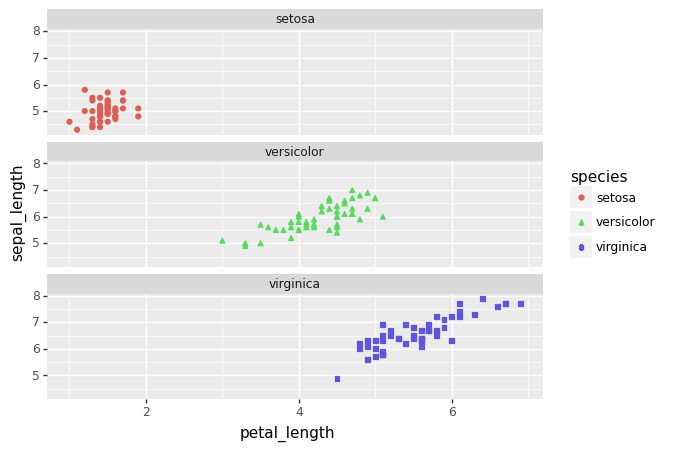

<ggplot: (382343274)>

In [35]:

p = ggplot(df_iris, aes("petal_length", "sepal_length", color="species", shape = "species")) + geom_point() \
    + facet_wrap("~species", ncol=1)
p